# **1- RDKit Introduction** ✍


Installing libraries.

In [ ]:
!pip install rdkit-pypi pandas seaborn mols2grid requests

Importing libraries. 

In [ ]:
from rdkit import Chem                                  # for Chemistry
from rdkit.Chem.Draw import IPythonConsole              # for drawing
from rdkit.Chem import Draw                             # for drawing

# "Further settings to improve structure qualities" 
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools                      # allow's to add a molecule to dataframe
import mols2grid                                        # to display molecule's in a grid 
import requests

### Displaying a single molecule from SMILES string

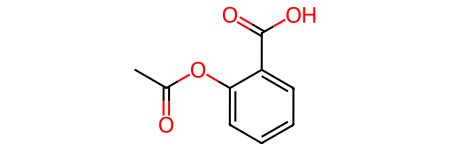

In [ ]:
aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
aspirin

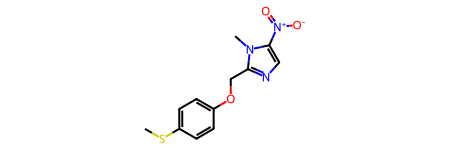

In [ ]:
fexinidazole = Chem.MolFromSmiles("CN1C(=CN=C1COC2=CC=C(C=C2)SC)[N+](=O)[O-]")
fexinidazole

### Reading Multiple Chemical Structures

(https://pubchem.ncbi.nlm.nih.gov/#query=anti%20cancer%20drugs)

In [ ]:
# List of anti-cancer drugs from PubChem, downloaded as .sdf format and uploaded to colab notebook. 

molecules = [x for x in Chem.SDMolSupplier("/content/PubChem_compound_text_anti cancer drugs_records.sdf")] # reads the molecules into a list.
molecules

### Displaying Multiple Chemical Structures in a Grid
A built-in [MolsToGridImage](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html) method in RDKit provides a convenient way of displaying a grid of structures. 

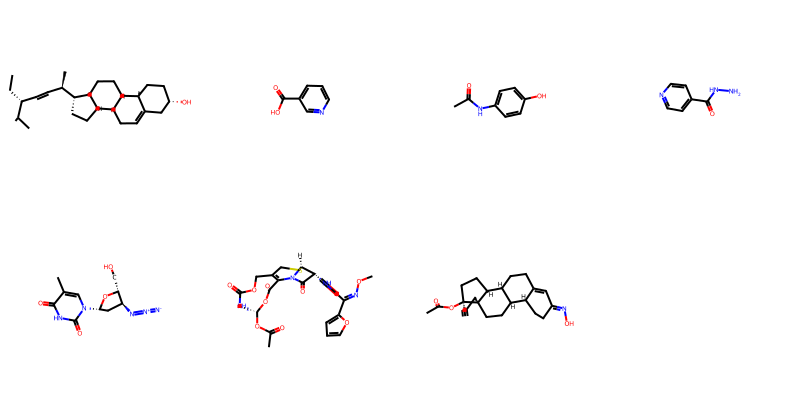

In [ ]:
Draw.MolsToGridImage(molecules,molsPerRow=4,useSVG=True)

To generate grid that allow selection of molecules, a [mols2grid](https://github.com/cbouy/mols2grid) Python library can be used. 

In [ ]:
mols2grid.display(molecules)

MolGridWidget()

To get the selected molecules in cells, select a few of the checkboxes in the grid and run the code below. 

In [ ]:
mols2grid.get_selection()

{1: 'O=C(O)c1cccnc1',
 6: 'C#C[C@]1(OC(C)=O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@H]4[C@H]3CC[C@@]21CC',
 4: 'Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(=O)[nH]c1=O',
 5: 'CO/N=C(\\C(=O)N[C@@H]1C(=O)N2C(C(=O)O[C@@H](C)OC(C)=O)=C(COC(N)=O)CS[C@H]12)c1ccco1'}

### Using the RDKit With Pandas Dataframes
To read an SD file into a [Pandas](https://pandas.pydata.org/) dataframe.  The Pandas dataframe holds data in a grid data structure that can be seen as similar to a spreadsheet. 

In [ ]:
df = PandasTools.LoadSDF("/content/PubChem_compound_text_anti cancer drugs_records.sdf")

**mols2grid** can be used to display the dataframe.  Note that we need to specify the column that contains the RDKit molecule. When the RDKit reads an SD file, the molecule is placed in the **ROMol** column. 

In [ ]:
mols2grid.display(df,mol_col= "ROMol")

/usr/local/lib/python3.9/dist-packages/mols2grid/select.py:25: UserWarning: Overwriting non-empty 'default' grid selection: {1: 'O=C(O)c1cccnc1', 6: 'C#C[C@]1(OC(C)=O)CC[C@H]2[C@@H]3CCC4=C/C(=N/O)CC[C@@H]4[C@H]3CC[C@@]21CC', 4: 'Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(=O)[nH]c1=O', 5: 'CO/N=C(\\C(=O)N[C@@H]1C(=O)N2C(C(=O)O[C@@H](C)OC(C)=O)=C(COC(N)=O)CS[C@H]12)c1ccco1'}
  warnings.warn(


MolGridWidget()

### Adding Properties to a Pandas Dataframe
To add molecular weight and LogP to the dataframe.

In [ ]:
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df.ROMol]
df['LogP'] = [MolLogP(x) for x in df.ROMol]

- **mols2grid** is used to display the dataframe with the newly added data.  
- **subset** variable to indicate which dataframe columns to display.  Note that the structure image is specified by the **"img"** column. 
- **transform** variable can be used to specify the number of decimal places to display for the MW and LogP columns. The **transform** variable accepts a dictionary of column names mapped to formatting functions.

In [ ]:
two_decimals = lambda x: f"{x:.2f}"
mols2grid.display(df,mol_col="ROMol",subset=["img","MW","LogP", "SMILES"] ,transform={"MW" : two_decimals, "LogP": two_decimals})

# the subset can be rearranged. 

MolGridWidget()

### Plotting Property Data

A boxplot to visualize the distribution of molecular weight within the dataframe.

In [ ]:
import seaborn as sns

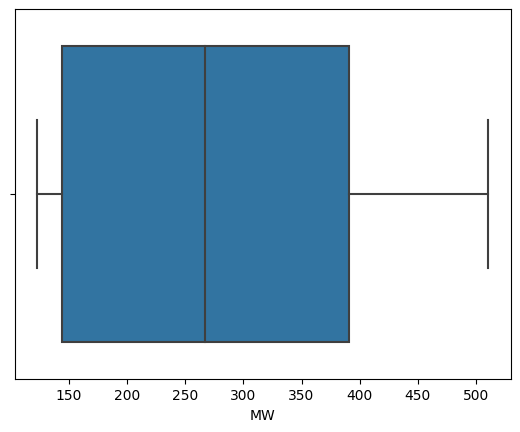

In [ ]:
ax = sns.boxplot(x=df.MW)

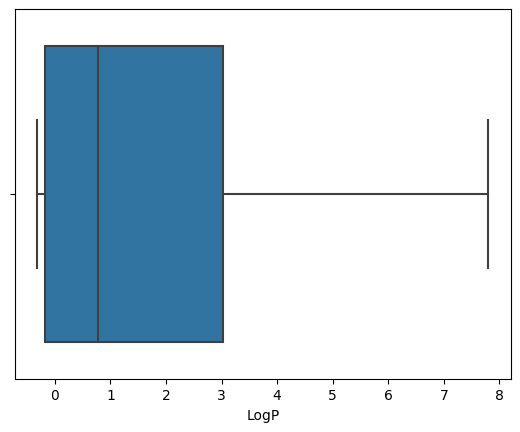

In [ ]:
b = sns.boxplot(x=df.LogP)